# Linear Regression Regularization and Bias (underfitting) vs. Variance (overfitting)

Hey there, hi there, ho there, dear reader! Andrew Ng's machine learning class (https://www.coursera.org/learn/machine-learning) has charged us with yet another task. Today we will be implementing linear regression (again), only this time we will be introducing the regularization parameter $\lambda$ (lambda). Regularization is used to keep our models from overfitting so that they generalize well to novel data examples. After that, we’ll implement polynomial regression, which builds on top of linear regression so that we can account for data that cannot be fit by a simple line. As always, we will do this from scratch and then using scikit learn. Let’s import some libraries!

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

Okay, now we can load in the data. This time we have a training data set and a validation data set. The training data are used to optimize the model parameters and the validation data are used to measure the performance of the trained model. Remember, we need to insert our vector of ones into both $X$ matrices for our bias term.

In [2]:
data = loadmat('data/ex5data1.mat')
y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


### Data Plotting
Not very helpful, right? Let’s plot the data so we can see out much trouble we’re in.

In [6]:
def plotData(X, y, theta = np.array(([0],[0])), reg = 0):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 1], y, s = 50, c = 'red', marker = 'x', linewidths = 1, label = 'Data')
    plt.grid(True)
    plt.title('Water Data')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    if theta.any() != 0:
        plt.plot(np.linspace(X.min(), X.max()), theta[0] + theta[1] * np.linspace(X.min(), X.max()), 
                                                 label = 'Optimized linear fit')
        plt.title('Water Data: Linear Fit')
        
    plt.legend()

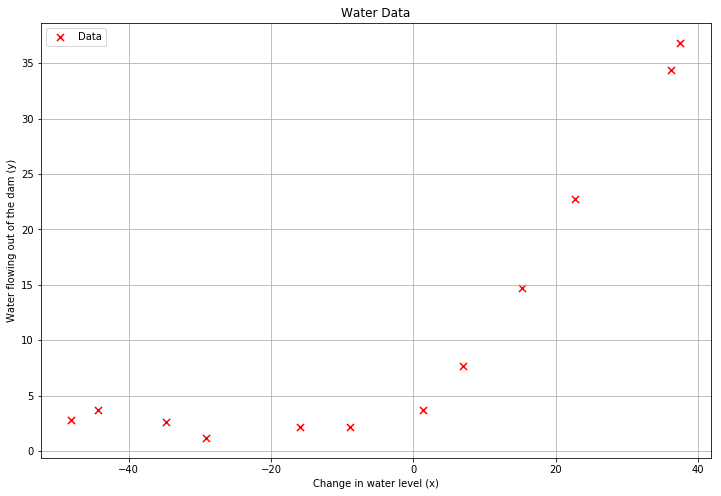

In [7]:
plotData(X_train, y_train)

So, as you can see above the data are definitely not going to be fit by a line. What do we do now? Well, first thing's first: let's define the linear regression cost function. The cost function (also called the loss function) determines the difference between the model's guess and the observed data value. This particular cost function is called the sum of squares. We also tack on a second term, which is called the regularization term that controls overfitting and underfitting. A higher $\lambda$ value means smaller parameter ($\theta$) values (danger of underfitting) and vice versa (danger of overfitting).

### Regularized Linear Regression Cost Function

$$J(\theta) = \frac{1}{2m} \Big(\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2\Big) + \frac{\lambda}{2m}\Big(\sum_{j=1}^n \theta_j^2\Big)$$

where $h_\theta(x)$ is the linear model defined by:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +  \theta_n x_n $$

where $m$ is the number of training examples, $n$ is the number of parameters, and $\theta_0$ is the bias term which goes unregularized.

In order to minimize this cost function, we also need to calculate the partial derivatives of $J$ with respect to each $\theta_{j}$.

### Linear Regression Partial Derivatives
$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} \Big( h_\theta (x^{(i)})-y^{(i)}\Big)x^{(i)}_{j} $      for $ j = 0 $

$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \Big(\frac{1}{m}\sum_{i=1}^{m}  ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}\Big) + \frac{\lambda}{m}\theta_j$ for $ j \geq1 $

These definitions are different because we do not regularize $\theta_0$, the bias term.

Just gotta code it up!

In [8]:
def cost(theta, X, y, reg = 0):
    m = y.size
    h = np.dot(X,theta).reshape((m, 1))
    J1 = (1 / (2 * m)) * np.sum(np.square(h - y))
    J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J = J1 + J2
    grad = ((1 / m)*(X.T.dot(h - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel()
    
    return J, grad

Let's take this bad boy for a spin. We'll initialize theta as a vector of ones with a dimensionality equal to the number of columns in our matrix $X$. Then we can just pass the function these variables and see what it outputs.

In [46]:
initial_theta = np.ones((X_train.shape[1], 1))
initial_cost, initial_grad = cost(initial_theta, X_train, y_train)
print("Initial cost: {0}   Initial gradient: {1}, {2}".format(initial_cost[0][0], initial_grad[0],  initial_grad[1]))

Initial cost: 303.9515255535976   Initial gradient: -15.303015674201186, 598.1674108393702


This what Professor Ng said to expect, so we're looking good! 

How do we use this function? Well, we could optimize our parameter values using gradient descent, which is great for its simplicity, but gradient descent is also slow and boring. Instead, let's use some blackbox optimizer from scipy! Interestingly, dear reader, the optimizer that works the best did not even need us to compute the gradient (the vector containing our partial derivatives). However, I did so as it's a key part of the assignment and I hoped you would find it helpful.

In [10]:
from scipy.optimize import minimize
def optimalTheta(theta, X, y, reg = 0):
    #Nelder-Mead yields best fit
    res = minimize(fun = cost, x0 = theta, args = (X, y, reg), method = 'Nelder-Mead', jac = True)
    
    return res.x

In [13]:
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))

Optimized theta: [13.08791065  0.36778096]


C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


### Linear Fit
Cool! Let's use our optimized theta to check our model's fit to the data

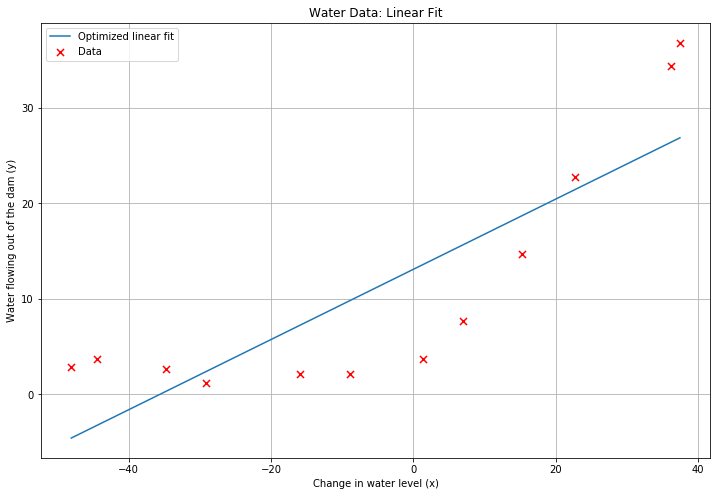

In [14]:
plotData(X_train, y_train, opt_theta)

That’s a wonderful line, dear reader, and identical to the line Andrew Ng said to draw. However, sadly, this line is not powerful enough to fit the data, as you can see above. We still have more work left to do!

### Learning Curve

We need to compare our model’s training error with the validation error. These error values are the numbers output by our cost function relative to both datasets.  If these error values are similar, then we can expect the model to perform similar on data it has seen before and on data it has never seen before. If the model performs well on the training data but poorly on the validation data, then we say the model is too complex and overfit (high variance). If the model performs poorly on the training data, then the model is too simple and underfit (high bias). If the model does poorly on both datasets, well… that’s a big problem.

One way to diagnose bias and variance errors is to plot the error relative to the training set and the validation data set. Let’s do that!


In [50]:
def plotLearningCurve(theta, X, y, Xval, yval, reg = 0):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    example_num = np.arange(1, (X.shape[0] + 1))
    for i in np.arange(m):
        
        opt_theta = optimalTheta(theta, X[:i + 1], y[:i + 1], reg)
        error_train[i] = cost(opt_theta, X[:i + 1], y[:i + 1], reg)[0]
        error_val[i] = cost(opt_theta, Xval, yval, reg)[0]
    
    plt.figure(figsize = (12, 8))
    plt.plot(example_num, error_train, label = 'Training Error')
    plt.plot(example_num, error_val, label = 'Cross Validation Error')
    plt.title('Learning Curve: No Regularization')
    if reg != 0:
        plt.title('Learning Curve: Lambda = {0}'.format(reg))
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


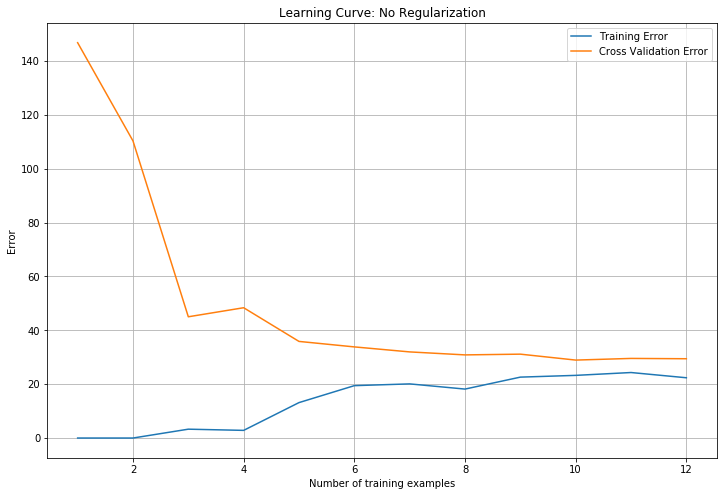

In [51]:
plotLearningCurve(initial_theta, X_train, y_train, Xval, yval)

It's our worst fear confirmed, dear reader. As the plot above shows, our error is high when the number of training examples increases, which is the exact opposite of what we should expect to see. This is definitely a high bias problem. Linear regression is just too simple to fit this dataset. Before we move on to polynomial regression, I would like to show you that you don't need to code up linear regression from scratch every single time you've got a line to draw - scikit learn can help you out!

### Scikit Learn Linear Regression

In [79]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train[:, 1].reshape(-1, 1), y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's compare our model with scikit learn's!

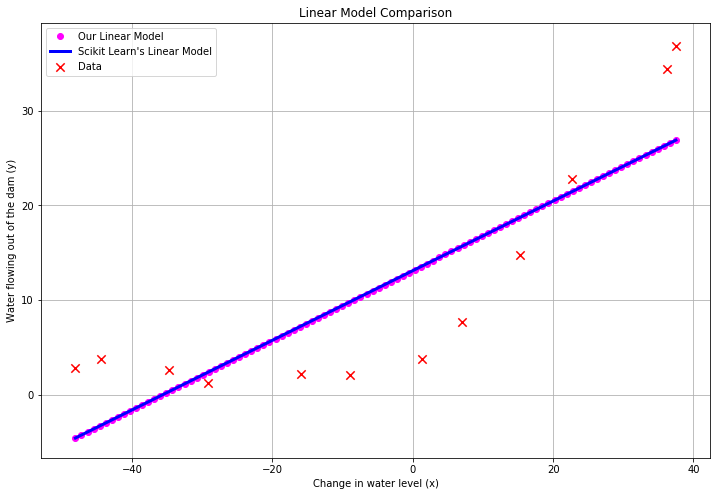

In [80]:
x_range = np.linspace(X_train.min(), X_train.max(), 100)
plt.figure(figsize = (12, 8))
plt.plot(x_range, opt_theta[0] + opt_theta[1] * x_range, 'o', c = 'magenta', label = 'Our Linear Model')
plt.plot(x_range,  lr.intercept_+ lr.coef_ * x_range, c  = 'blue', linewidth = 3,
         label = "Scikit Learn's Linear Model")
plt.scatter(X_train[:,1], y_train, s = 70, c = 'red', marker = 'x', linewidths = 1, label = "Data")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Linear Model Comparison')
plt.legend()
plt.grid(True)

And we drew identical lines! How cool is that? Anyway, I hope you trust scikit learn as much as I do.

### Polynomial Regression

Addressing a simple linear model means adding more features which are no longer linear, but are instead the features being raised to higher powers. Explicitly, we will redefine $h$ as

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 * (waterLevel) + \theta_2 * (waterLevel)^2 + ... +  \theta_p * (waterLevel)^p $$
$$ = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +  \theta_p x_p $$

So we are just squaring, cubing, etc the columns of our $X$ matrix and then multiplying these new features by new parameters $\theta$ and adding all that together. This is called feature mapping -- we are mapping the old features to a higher dimension. Let's code it up! We will also code up feature normalization, which is defined as

$$ X_{norm} = \frac{(X - \mu)}{\sigma} $$

where $\mu$ is the mean and $\sigma$ is the standard deviation. We do feature normalization because after feature mapping, the values need to be rescaled.


In [20]:
def polyFeatures(X, p):
    for i in np.arange(p):
        dim = i + 2
        X = np.insert(X, X.shape[1], np.power(X[:,1], dim), axis = 1)
    
    X_norm = X
    #column wise
    means = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    stds = np.std(X_norm, axis = 0)
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]
    
    return X, X_norm    

Looks good! Now we just need to fit theta to our new higher dimensional $X$ matrix and plot the fit. Andrew Ng says to set p to 8, so let's do that too!

### Plot polynomial fit

In [23]:
degree = 8

In [26]:
def plotFit(X, y, degree, num_points, reg = 0):
    X_poly = polyFeatures(X, degree)[1]
    starting_theta = np.ones((X_poly.shape[1], 1))
    opt_theta = optimalTheta(starting_theta, X_poly, y, reg)
    x_range = np.linspace(-55, 50, num_points)
    x_range_poly = np.ones((num_points, 1))
    x_range_poly = np.insert(x_range_poly, x_range_poly.shape[1], x_range.T, axis = 1)
    x_range_poly = polyFeatures(x_range_poly, len(starting_theta)-2)[0]
    y_range = x_range_poly @ opt_theta
    plotData(X, y)
    plt.plot(x_range, y_range, "--", color = "blue", label = "Polynomial regression fit")
    plt.title('Polynomial Regression Fit: No Regularization')
    if reg != 0:
        plt.title('Polynomial Regression Fit: Lambda = {0}'.format(reg))
    plt.legend()
    
    

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


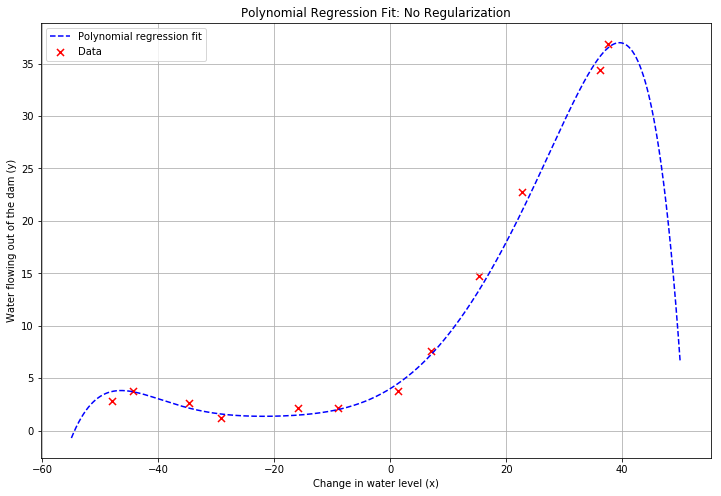

In [27]:
plotFit(X_train, y_train, degree, 1000)

That's a nice fit! Too nice in fact. We will definitely have a low training error, however, this fit is far too complex and does crazy things in the extreme values of the training data range. This indicates our model is overfit (high variance), so we now have the opposite problem. Let's plot the new learning curve so I can show you what I mean.

### Polynomial Learning Curve

In [28]:
X_poly = polyFeatures(X_train, degree)[1]
X_poly_val = polyFeatures(Xval, degree)[1]

In [29]:
starting_theta = np.ones((X_poly.shape[1], 1))

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


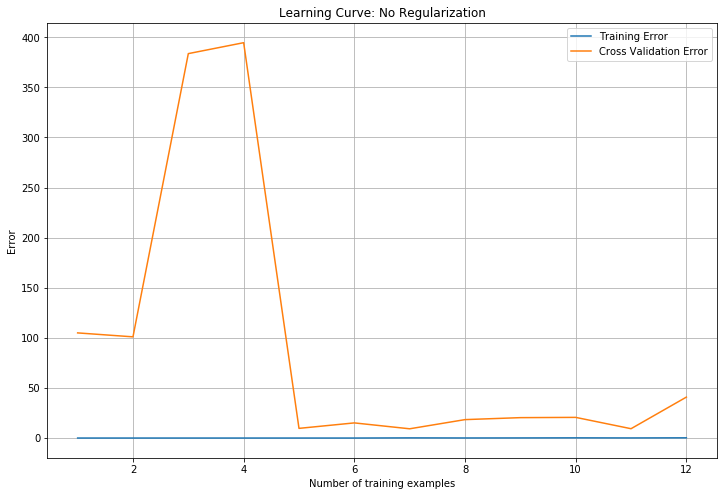

In [30]:
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, yval)

In the above plot, you can see the training error is basically zero, which is good, but it would also be nice if the cross-validation error was also low. As you can see above, the cross-validation error is still high when we have more training examples. This means the model does not generalize well to data that were not used to optimize its parameter values. In short, the model is overfit (high variance). 

### Regularization: Adjusting $\lambda$

How do we overcome overfitting? We use our regularization parameter, $\lambda$! So far, we've been using $\lambda = 0$, which means no regularization at all. Let's try using a $\lambda$-value of $1$ and see what happens to our polynomial regression fit and the learning curves.

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


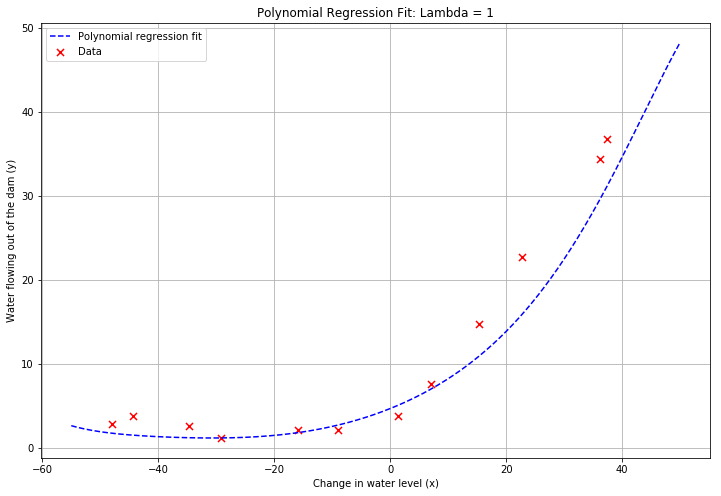

In [66]:
plotFit(X_train, y_train, degree, 1000, 1)

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


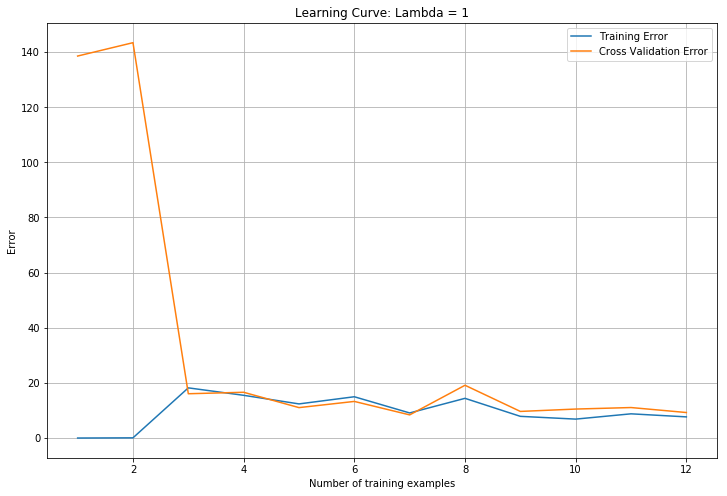

In [32]:
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, yval, 1)

As the above plots show, we no longer fit the training set perfectly, however, our cross-validation error has significantly decreased to the point where it is almost the same as our training error. This is encouraging and an indicator of a model that can generalize well.


### Underfitting
We've seen what happens when $\lambda = 0$ and $\lambda = 1$, but happens if we crank $\lambda$ up to something ridiculously high, like $100$ for example?

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


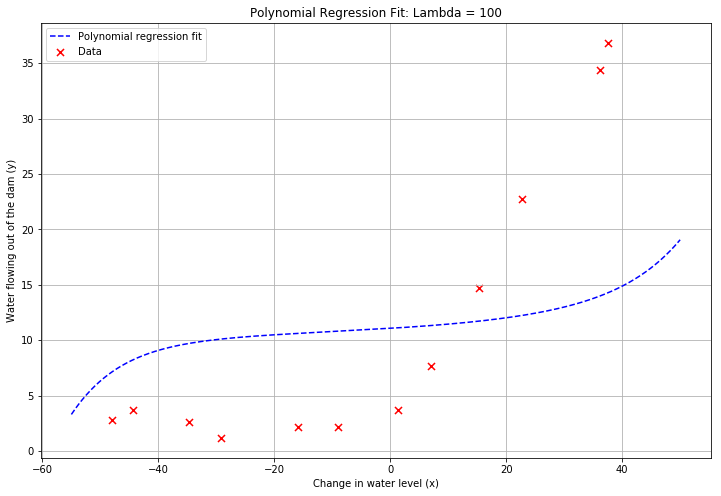

In [33]:
plotFit(X_train, y_train, degree, 1000, 100)

C:\Users\Theochem\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  RuntimeWarning)


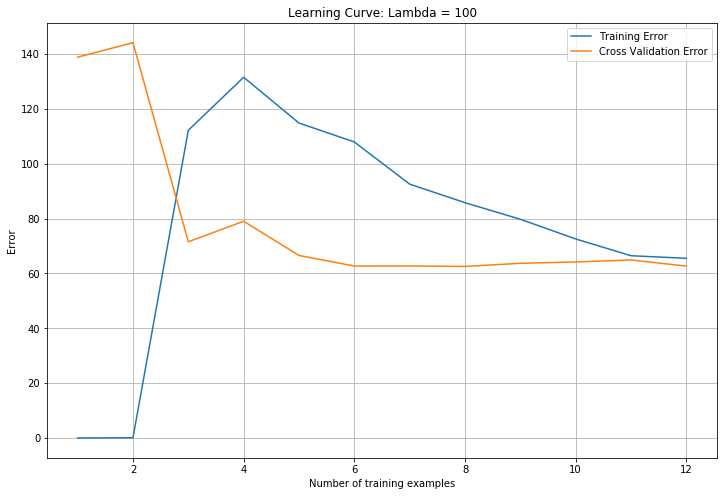

In [34]:
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, yval, 100)

Now we're back to the problem we had with our linear model; the model is underfit! When $\lambda$ is too high, the values of $\theta$ are pushed too close to zero and cannot fit the data well. As such, we do poorly on both the training and cross-validation data. Playing with the value of $\lambda$ to find the best fit is the eternal struggle of machine learning, even in neural networks!

### Polynomial Regression with Scikit Learn

To end with, dear reader, I would like to show you that scikit learn can also be used to produce polynomial features (feature mapping), which can then be used to perform polynomial regression, as well. You can use ridge regression or linear regression, and I think you’ll find they perform identically in this instance.

In [89]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [90]:
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train[:, 1].reshape(-1, 1))

In [91]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

ridge = Ridge()
ridge.fit(X_train_poly, y_train)

C:\Users\Theochem\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.178313e-27
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [92]:
x_range = np.linspace(X_train.min(), X_train.max())
x_values =  poly.fit_transform(x_range.reshape(-1, 1))
y_range_lr = lr.intercept_+ np.sum(lr.coef_ * x_values, axis = 1)
y_range_ridge = ridge.intercept_ + np.sum(ridge.coef_ * x_values, axis = 1)

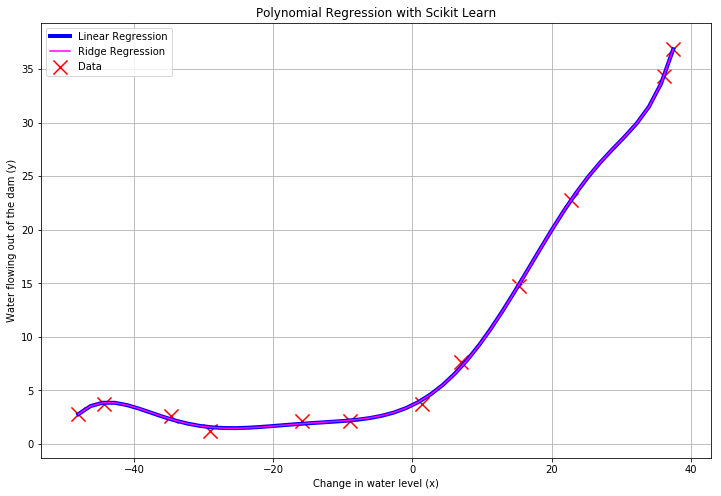

In [95]:
plt.figure(figsize=(12, 8))
plt.plot(x_range, y_range_lr, c = 'blue', linewidth = 4, label = 'Linear Regression')
plt.plot(x_range, y_range_ridge, c  = 'magenta', label='Ridge Regression')
plt.scatter(X_train[:,1], y_train, s = 200, c = 'red', marker = 'x', linewidths = 1, label = "Data")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression with Scikit Learn')
plt.legend()
plt.grid(True)

See? Identical fits! I hope you can tell for yourself that both models are overfit, so the scikit learn default settings will need to be played with a little in order to find models that can generalize well to new examples. I encourage you to do so!

Overfitting or no overfitting that ends this assignment. I hope this was helpful for you, dear reader.